# ANALYZE  AND  PROVIDE INSIGHTS  ON AMAZON  SALES  REPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Amazon sales report.csv", encoding='ISO-8859-1')
df


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
#The first few rows of the dataframe
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
#The last few rows of the dataframe
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
#Random sample of 3 rows from the dataframe
df.sample(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
103336,103335,405-4484081-4134732,06-19-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,M,Cancelled,...,NaN,NaN,PALAKKAD,KERALA,679554.0,IN,False,NaN,NaN,NaN
47036,47035,407-9687102-1671541,04-02-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,453.0,KUNNAMKULAM,KERALA,680523.0,IN,False,NaN,NaN,NaN
126328,126327,408-4805667-6926748,06-02-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,...,INR,899.0,KARAIKAL,PUDUCHERRY,609604.0,IN,False,Easy Ship,NaN,NaN


In [6]:
#Shape of the data
df.shape

(128976, 21)

In [7]:
#Total size of the data
df.size

2708496

In [8]:
#Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
#Checking number of uniqe values of each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [10]:
df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [11]:
df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [12]:
df["Sales Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [13]:
df["ship-service-level"].unique()

array(['Standard', 'Expedited'], dtype=object)

In [14]:
df["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [15]:
df["Size"].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [16]:
df["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [17]:
df["ship-city"].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [18]:
df["Courier Status"].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [19]:
df["B2B"].unique()

array([False,  True])

In [20]:
# Replace value
replacement_dict = {
    ('Goa', 'goa'): 'GOA',
    ('Delhi', 'delhi', 'New Delhi'): 'DELHI',
    ('Rajshthan', 'Rajasthan', 'Rajsthan', 'rajsthan', 'rajasthan', 'R3'): 'RAJASTHAN',
    ('Punjab', 'punjab', 'Punjab/Mohali/Zirakpur', 'PB', 'Chandigarh', 'CHANDIGARH'): 'PUNJAB',
    ('Manipur', 'manipur'): 'MANIPUR',
    ('Odisha', 'orissa', 'Orissa'): 'ODISHA',
    ('NL', 'Nagaland'): 'NAGALAND',
    ('Bihar', 'bihar'): 'BIHAR',
    ('Puducherry', 'Pondicherry', 'PUDUCHERRY'): 'TAMIL NADU',
    ('Mizoram', 'mizoram'): 'MIZORAM',
    ('Arunachal Pradesh', 'Arunachal pradesh', 'AR'): 'ARUNACHAL PRADESH',
    ('APO',): 'ANDHRA PRADESH',
    ('Meghalaya', 'meghalaya'): 'MEGHALAYA',
    ('Sikkim', 'sikkim'): 'SIKKIM',
    ('Gujarat', 'gujarat'): 'GUJARAT'
}


In [21]:
def replace_multiple(df, column, replacements):
    for keys, value in replacements.items():
        if isinstance(keys, tuple):
            df[column] = df[column].replace(keys, value)
        else:
            df[column] = df[column].replace(keys, value)
    return df



In [22]:
df = replace_multiple(df, 'ship-state', replacement_dict)


In [23]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'GUJARAT',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'RJ', 'LAKSHADWEEP'], dtype=object)

In [24]:
#checking null values
df.isna().sum()/len(df)*100

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64

# Handing missing values

In [25]:
#Dropping the columns new,pendings,fullfilled_by,currency,ship_country
#Dropping the columns new,pendings,fullfilled_by,currency,ship_country
df.drop(["New", "PendingS", "fulfilled-by", "currency", "ship_country"], axis=1, inplace=True, errors='ignore')

In [26]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,TAMIL NADU,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [27]:
#Replacing missing values of amount column with median
df["Amount"].fillna(df["Amount"].median(),inplace=True)

In [28]:
#dropping missing value row wise
df.dropna(inplace=True)

In [29]:
df.isnull().mean()*100

index                 0.0
Order ID              0.0
Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Category              0.0
Size                  0.0
Courier Status        0.0
Qty                   0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
ship-country          0.0
B2B                   0.0
dtype: float64

In [30]:
df.duplicated().sum()

166

In [31]:
df.drop_duplicates(inplace=True)
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [32]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')


In [33]:
df['ship-postal-code'].dtype

dtype('int32')

In [34]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [35]:
df.rename(columns={"Qty":"Quantity"},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128775 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128775 non-null  int64         
 1   Order ID            128775 non-null  object        
 2   Date                128775 non-null  datetime64[ns]
 3   Status              128775 non-null  object        
 4   Fulfilment          128775 non-null  object        
 5   Sales Channel       128775 non-null  object        
 6   ship-service-level  128775 non-null  object        
 7   Category            128775 non-null  object        
 8   Size                128775 non-null  object        
 9   Courier Status      128775 non-null  object        
 10  Quantity            128775 non-null  int64         
 11  Amount              128775 non-null  float64       
 12  ship-city           128775 non-null  object        
 13  ship-state          128775 no

In [37]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [38]:
df.describe()

,index,Quantity,Amount,ship-postal-code
count,128775.000000,128775.000000,128775.000000,128775.00000
mean,64564.787948,0.904430,646.004662,463957.07107
std,37192.505842,0.313359,272.797676,191478.52940
min,0.000000,0.000000,0.000000,110001.00000
25%,32371.500000,1.000000,459.000000,382421.00000
50%,64569.000000,1.000000,605.000000,500033.00000
75%,96772.500000,1.000000,771.000000,600024.00000
max,128974.000000,15.000000,5584.000000,989898.00000


# Exploratory  Data   Analysis

# Sales overview: understand the overall sales performance,trends and patterns over time

In [39]:
#extract week,year,month and day
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [40]:
#create a Total sales column
df['Total Sales']=df['Amount']*df['Quantity']

In [41]:
df['Month']=df['Month'].replace({3:'March',4:'April',5:'May',6:'June'})

In [42]:
import datetime
def int_to_dayname(Day):
    reference_date=datetime.date(2022,3,1)
    actual_date=reference_date+datetime.timedelta(days=Day-1)
    return actual_date.strftime('%A')

In [43]:
df['Day_name']=df['Day'].apply(int_to_dayname)

In [44]:
df['Total Sales in Million']=df['Total Sales']/1000000
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-postal-code,ship-country,B2B,Week,Year,Day,Month,Total Sales,Day_name,Total Sales in Million
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,400081,IN,False,17,2022,30,April,0.0,Wednesday,0.000000
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,560085,IN,False,17,2022,30,April,406.0,Wednesday,0.000406
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,410210,IN,True,17,2022,30,April,329.0,Wednesday,0.000329
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,605008,IN,False,17,2022,30,April,0.0,Wednesday,0.000000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,600073,IN,False,17,2022,30,April,574.0,Wednesday,0.000574


In [45]:
daily_sales= df.groupby('Date') ['Total Sales in Million'].sum().reset_index()

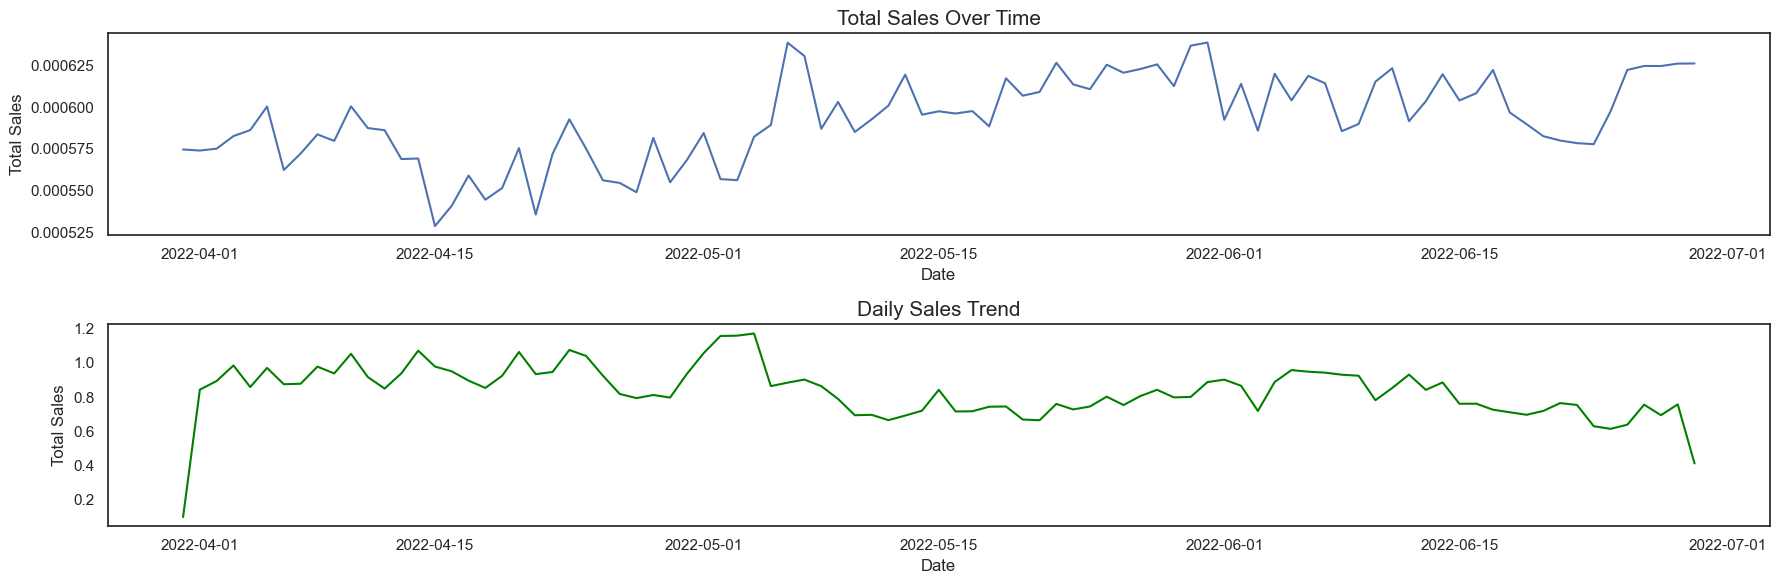

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

sns.set(style="white")

# Plotting Total Sales Over Time
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='Date', y='Total Sales in Million', ci=None)
plt.title("Total Sales Over Time", fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Plotting Daily Sales Trend
plt.subplot(2, 1, 2)
sns.lineplot(data=daily_sales, x='Date', y='Total Sales in Million', color="green")
plt.title("Daily Sales Trend", fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

plt.tight_layout()
plt.show()


# Monthly Sales trend

In [47]:
monthly_sales=df.groupby('Month')['Total Sales in Million'].sum().reset_index()

In [48]:
monthly_sales

,Month,Total Sales in Million
0,April,27.805861
1,June,22.776386
2,March,0.098261
3,May,25.344862


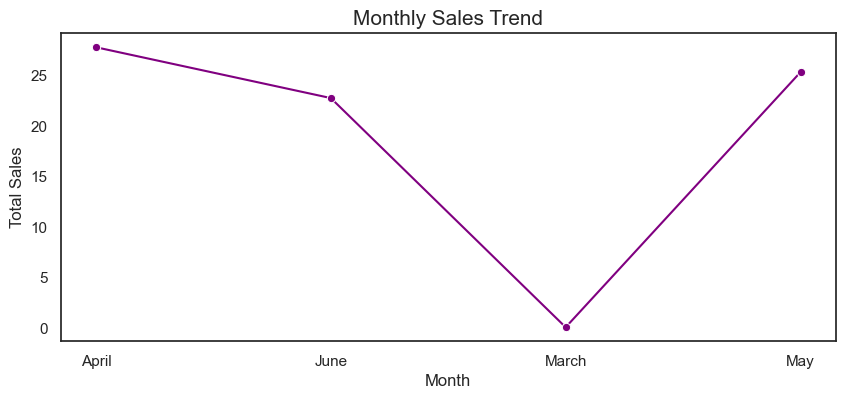

In [81]:
plt.figure(figsize=(10, 4))
sns.set(style="white")

sns.lineplot(x='Month', y='Total Sales in Million', data=monthly_sales, color='purple', marker='o')

plt.title('Monthly Sales Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.set(style='white')

# Plotting Monthly Sales Trend
sns.lineplot(x='Month', y='Total Sales in Million', data=monthly_sales, color='purple', marker='o')

plt.title('Monthly Sales Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()


# Weekly sales trend and sales by day of the week

In [ ]:
weekly_sales=df.groupby('Week')['Total Sales in Million'].sum().reset_index().sort_values('Total Sales in Million',ascending=False)
weekly_sales

In [ ]:
plt.figure(figsize=(12,4)) 
sns.set(style='darkgrid')

plt.subplot(1,2,1)

sns.barplot(x='Week', y='Total Sales in Million', data=weekly_sales, palette='summer')

plt.title('Weekly Sales Trend', fontsize=15)

plt.xlabel('Week', fontsize=12) 

plt.ylabel('Total Sales in Million', fontsize=12)
sns.set(style="darkgrid")

plt.subplot(1,2,2)

sns.barplot(x='Day name', y='Total Sales in Million', data=weekday_sales, palette='copper') 
plt.title('Sales by Day of the Week', fontsize=15)

plt.xlabel('Day of the Week', fontsize=12)

plt.ylabel('Total Sales in Million', fontsize=12)

plt.tight_layout()

plt.show()

# Analyze product category distribution

In [ ]:
category_dist=df['Category'].value_counts()
category_dist

# Product size distribution

In [50]:
size_counts=df['Size'].value_counts()
size_counts

M       22343
L       21768
XL      20516
XXL     17780
S       16748
3XL     14625
XS      11032
Free     2250
6XL       738
5XL       550
4XL       425
Name: Size, dtype: int64

# Popular product by category and size

In [51]:
quantity_sold=df.groupby(['Category','Size'])['Quantity'].sum().reset_index()
popular_product=quantity_sold.nlargest(5,'Quantity')
popular_product


,Category,Size,Quantity
31,T-shirt,M,8346
12,Shirt,L,8031
15,Shirt,XL,7825
13,Shirt,M,7699
30,T-shirt,L,7385


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'T-shirt'),
  Text(1, 0, 'Shirt'),
  Text(2, 0, 'Blazzer'),
  Text(3, 0, 'Trousers'),
  Text(4, 0, 'Perfume'),
  Text(5, 0, 'Socks'),
  Text(6, 0, 'Shoes'),
  Text(7, 0, 'Wallet'),
  Text(8, 0, 'Watch')])

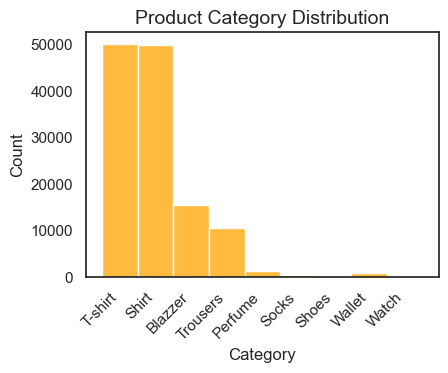

In [52]:
plt.figure(figsize=(10,7))
sns.set(style='white')

plt.subplot(2,2,1)

sns.histplot(x='Category',data=df,color='orange')

plt.title('Product Category Distribution', fontsize=14)

plt.xlabel("Category", fontsize=12)

plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right')




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'S'),
  Text(1, 0, '3XL'),
  Text(2, 0, 'XL'),
  Text(3, 0, 'L'),
  Text(4, 0, 'XXL'),
  Text(5, 0, 'XS'),
  Text(6, 0, '6XL'),
  Text(7, 0, 'M'),
  Text(8, 0, '4XL'),
  Text(9, 0, 'Free'),
  Text(10, 0, '5XL')])

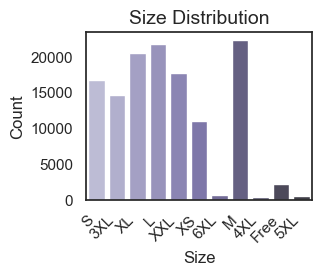

In [53]:
plt.subplot(2,2,2)

sns.countplot(x='Size',data=df, palette='Purples_d')

plt.title('Size Distribution', fontsize=14)

plt.xlabel("Size", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right')





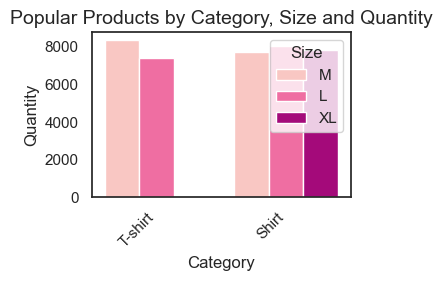

In [54]:
plt.subplot(2,2,3)

sns.barplot(x='Category', y='Quantity', data=popular_product, hue='Size', palette='RdPu', saturation=0.9)
plt.title('Popular Products by Category, Size and Quantity', fontsize=14)

plt.xlabel("Category", fontsize=12)

plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

# distribution of fulfillment

In [55]:
fulfillment_dist=df['Fulfilment'].value_counts().reset_index()
fulfillment_dist

,index,Fulfilment
0,Amazon,89575
1,Merchant,39200


# sucess rate analysis

In [56]:
success_rate=df[(df['Status']=='Shipped-Delivered to Buyer')|(df['Status']=='Shipped')].groupby('Fulfilment').size()*100
Sr=success_rate.reset_index(name='Success rate')

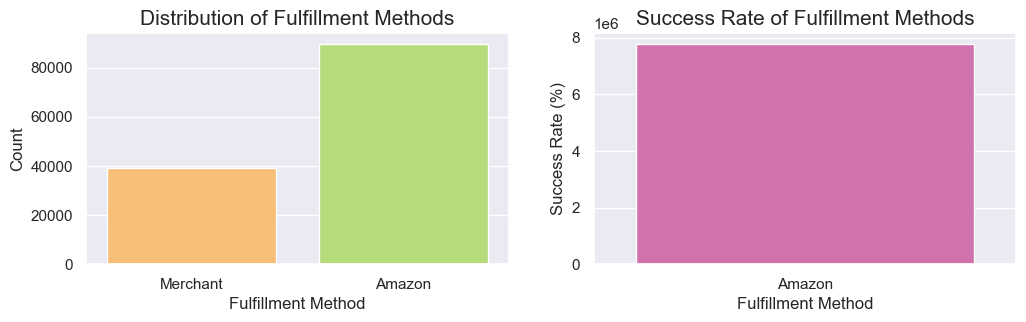

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 3))
sns.set(style='darkgrid')

# Plotting Distribution of Fulfillment Methods
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Fulfilment', palette='RdYlGn', saturation=0.9)
plt.title('Distribution of Fulfillment Methods', fontsize=15)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plotting Success Rate of Fulfillment Methods
plt.subplot(1, 2, 2)
sns.barplot(x='Fulfilment', y='Success rate', data=Sr, palette='PuRd')
plt.title('Success Rate of Fulfillment Methods', fontsize=15)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.show()


# Customer  Segmentation

In [58]:
##Feature Engineering
#Calculate total amount spent each customer

In [59]:
customer_df=df.groupby('Order ID').agg({'Amount':'sum','Quantity':'sum','ship-city':'first','ship-state':'first','ship-postal-code':'first','B2B':'first'}).reset_index()

In [60]:
#Rename columns for clarity
customer_df.rename(columns={'Amount':'Total Amount Spent','Quantity':'Total Quantity Purchased'},inplace=True)

In [61]:
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False  
1            Howrah    WEST BENGAL            711104  False  
2             KODAD      TELANGANA            508206  False  
3     GREATER NOIDA  UTTAR PRADESH            201306  False  
4         FIROZABAD  UTTAR PRADESH            283203  False  


In [62]:
#segmentation of clustering
features=customer_df[['Total Amount Spent','Total Quantity Purchased']]

In [63]:
#standardize the features
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [64]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


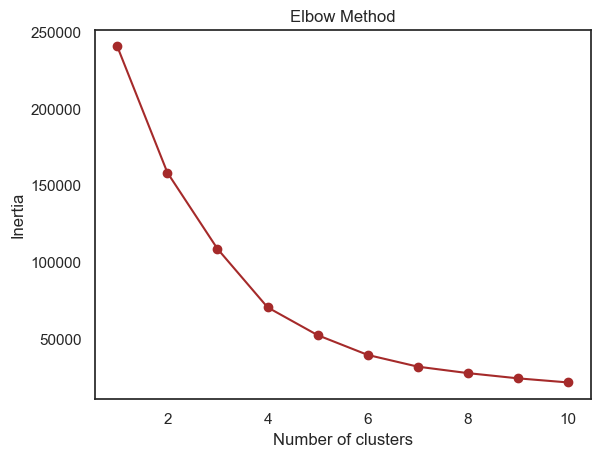

In [72]:
#plot the elbow curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.plot(range(1,11),inertia,marker='o',color='brown')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# The elbow in the plot is aound 3 clusters.this suggests that using 3 clusters is a reasonable choice for segmenting  the customers.

In [74]:
optimal_clusters=3

In [78]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)


In [79]:
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  Cluster  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False        0  
1            Howrah    WEST BENGAL            711104  False        0  
2             KODAD      TELANGANA            508206  False        0  
3     GREATER NOIDA  UTTAR PRADESH            201306  False        0  
4         FIROZABAD  UTTAR PRADESH            283203  False        0  


In [83]:
cluster_analysis=customer_df.groupby('Cluster').agg({'Total Amount Spent':['mean','sum'],'Total Quantity Purchased':['mean','sum'],'ship-city':'count','ship-state':'first','ship-postal-code':'first','B2B':'first'}).reset_index()

In [84]:
cluster_analysis.columns=['Avg Amount Spent', 'Total Amount Spent','Avg Quantity Purchased','Total Quantity Purchased', 'Customer Count','Representative City','Representative State','Representative Postal Code', 'B28']

In [85]:
cluster_analysis

,Avg Amount Spent,Total Amount Spent,Avg Quantity Purchased,Total Quantity Purchased,Customer Count,Representative City,Representative State,Representative Postal Code,B28
0,0,649.009248,66385858.00,1.006208,102923,102288,MAHARASHTRA,412101,False
1,1,1521.236652,9106122.60,2.262780,13545,5986,GUJARAT,380015,False
2,2,645.365120,7697269.79,0.000000,0,11927,GUJARAT,382424,False


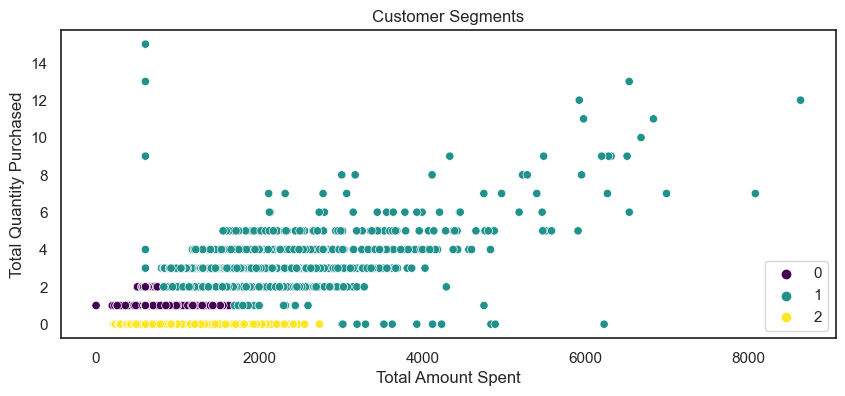

In [87]:
plt.figure(figsize=(10,4))

sns.set(style='white')

sns.scatterplot(x='Total Amount Spent', y='Total Quantity Purchased', hue='Cluster',data=customer_df, palette ='viridis') 
                

plt.title('Customer Segments')

plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity Purchased')

plt.legend(loc ='lower right')

plt.show()

# geographical analysis

In [89]:
bottom_sales_state=df.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).tail(5)

In [107]:
bottom_sales_state

,ship-state,Total Sales in Million
22,MIZORAM,0.039605
6,DADRA AND NAGAR,0.039276
16,LADAKH,0.036737
17,LAKSHADWEEP,0.002441
27,RJ,0.001040


In [110]:
top_State_sales=df.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).head(5)
top_State_sales

,ship-state,Total Sales in Million
19,MAHARASHTRA,12.921668
14,KARNATAKA,10.208746
30,TELANGANA,6.699150
32,UTTAR PRADESH,6.553145
29,TAMIL NADU,6.505236


Text(0.5, 0, 'State')

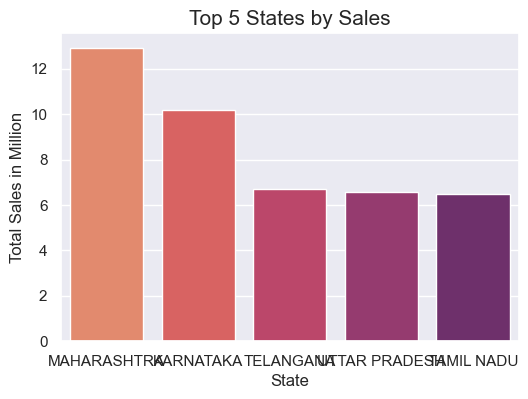

In [111]:
plt.figure(figsize=(13, 4))
sns.set(style='darkgrid')

# Plot for Top 5 States by Sales
plt.subplot(1, 2, 1)
sns.barplot(x='ship-state', y='Total Sales in Million', data=top_State_sales, palette='flare',saturation=0.9)
plt.title('Top 5 States by Sales', fontsize=15)
plt.ylabel('Total Sales in Million', fontsize=12)
plt.xlabel('State', fontsize=12)



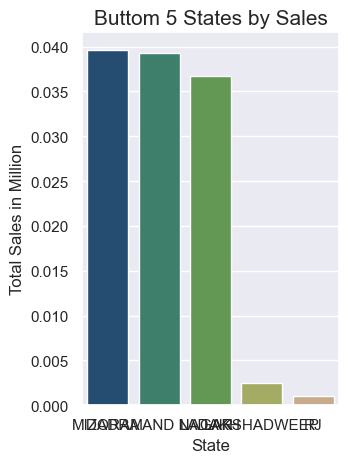

In [117]:
plt.subplot(1,2,2)

sns.barplot(x='ship-state',y='Total Sales in Million', data=bottom_sales_state, palette ='gist_earth', saturation=0.8)

plt.title('Buttom 5 States by Sales', fontsize=15)

plt.ylabel('Total Sales in Million', fontsize=12)

plt.xlabel('State', fontsize=12)

plt.tight_layout()
plt.show()

In [118]:
top_sales_cities=df.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).head(10)
top_sales_cities

,ship-city,Total Sales in Million
775,BENGALURU,6.698265
2904,HYDERABAD,4.793958
4793,MUMBAI,3.585314
5391,NEW DELHI,3.490346
1464,CHENNAI,2.994311
6156,PUNE,2.270924
3710,KOLKATA,1.368826
2618,GURUGRAM,1.192451
7583,THANE,0.968244
4395,LUCKNOW,0.895673


In [120]:
bottom_sales_cities=df.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).tail(10)
bottom_sales_cities

,ship-city,Total Sales in Million
8380,"Vizhinjam, Trivandrum",0.0
5383,NEPANAGAR,0.0
8382,Vizianagaram a,0.0
1323,Bokaro steel city,0.0
5459,NIVI,0.0
5442,NIBRA,0.0
1333,Borivali East,0.0
5416,NEW DELHIDe,0.0
8401,WANI,0.0
1410,CHANDERI,0.0


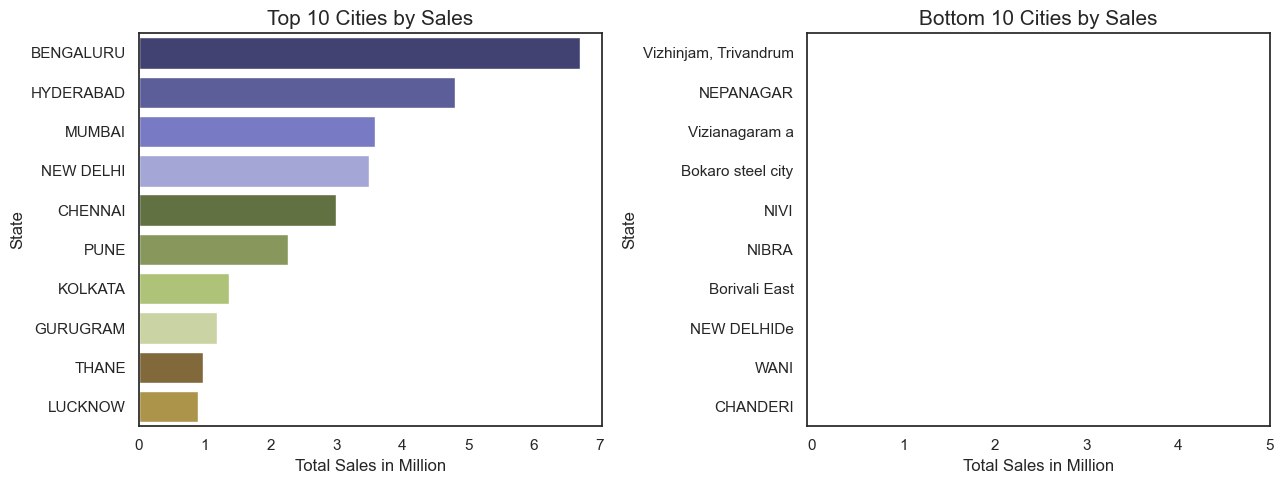

In [122]:
plt.figure(figsize=(13,5))

sns.set(style='white')

plt.subplot(1,2,1)

sns.barplot(y='ship-city', x='Total Sales in Million', data=top_sales_cities, palette='tab20b')

plt.title('Top 10 Cities by Sales', fontsize=15)

plt.xlabel('Total Sales in Million', fontsize=12)

plt.ylabel('State', fontsize=12)

plt.subplot(1,2,2)

sns.barplot(y='ship-city',x='Total Sales in Million', data=bottom_sales_cities)

plt.title('Bottom 10 Cities by Sales', fontsize=15)

plt.xlabel('Total Sales in Million', fontsize=12)

plt.ylabel('State', fontsize=12) 
plt.xticks([0, 1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

# Key Findings:

* Top 10 Cities by Sales:

* Bengaluru leads the sales with the highest total sales in millions.

* Hyderabad, Mumbai, New Delhi, and Chennal follow, indicating these cities are major hubs for Amazon sales.

* Other top cities include Pune, Kolkata, Gurugram, Thane, and Lucknow.

# Bottom 10 Cities by Sales:

* Barnala and Kanti Nagar extension, Krishna Nagar have the lowest sales.

* Other cities with minimal sales include Kanpur dehat, Kanjirappally (Kottayam), Kandivali (W), Mumbal, Barghat,Kanchikacheria,Kalwa(Thane),Barki Saraiya and Shalimar Bagh.


# Insights:

* Bengaluru, Hyderabad, Mumba, New Delhi and Chennal lead in sales, showing a strong customer base in these metropolitan areas.

* Cities with lower sales, especially the bottom 10, have potential for growth. Targeted marketing and better agistics sould boost sales here.

* The sales gap between tap and bottom cities might be due to infrastructure and logistics differences. Improving delivery infrastructure in low-performing cities could enhance sales.